In [58]:
conda update -c conda-forge scikit-learn #had to update the anaconda software for installing plot_confusion_matrix
#Since had not updated it before

Solving environment: - 

Updating scikit-learn is constricted by 

anaconda -> requires scikit-learn==0.22.1=py37h27c97d8_0

If you are sure you want an update of your package either try `conda update --all` or install a specific version of the package you want using `conda install <pkg>=<version>`

done


==> WARNING: A newer version of conda exists. <==
  current version: 4.8.2
  latest version: 4.10.3

Please update conda by running

    $ conda update -n base -c defaults conda



## Package Plan ##

  environment location: /Users/umaidsingh/opt/anaconda3

  added / updated specs:
    - scikit-learn


The following packages will be downloaded:

    package                    |            build
    ---------------------------|-----------------
    applaunchservices-0.2.1    |             py_0           8 KB  conda-forge
    asn1crypto-1.3.0           |           py37_0         159 KB  conda-forge
    attrs-19.3.0               |             py_0          35 KB  conda-forge
    backpo

In [7]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.tree import DecisionTreeClassifier
from sklearn.tree import plot_tree
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.metrics import plot_confusion_matrix
from sklearn import metrics
#did import a whole new set of modules which I thought would work for making decision tree from going 
#through youtube videos.


In [8]:
tele= pd.read_csv('Telecommunication.csv')
tele.head() #used for getting to display the whole set of data which we had got of telecommunication industry.

,customerID,gender,SeniorCitizen,Dependents,tenure,PhoneService,MultipleLines,OnlineBackup,DeviceProtection,TechSupport,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,TotalCharges,Churn
0,7590-VHVEG,Female,0,No,1,No,No phone service,Yes,No,No,No,Month-to-month,Yes,Electronic check,29.85,No
1,5575-GNVDE,Male,0,No,34,Yes,No,No,Yes,No,No,One year,No,Mailed check,1889.50,No
2,3668-QPYBK,Male,0,No,2,Yes,No,Yes,No,No,No,Month-to-month,Yes,Mailed check,108.15,Yes
3,7795-CFOCW,Male,0,No,45,No,No phone service,No,Yes,Yes,No,One year,No,Bank transfer (automatic),1840.75,No
4,9237-HQITU,Female,0,No,2,Yes,No,No,No,No,No,Month-to-month,Yes,Electronic check,151.65,Yes


In [9]:
X= tele.drop(['Churn','customerID'], axis=1).copy() #it is the data which has all the features in it
X.head()

,gender,SeniorCitizen,Dependents,tenure,PhoneService,MultipleLines,OnlineBackup,DeviceProtection,TechSupport,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,TotalCharges
0,Female,0,No,1,No,No phone service,Yes,No,No,No,Month-to-month,Yes,Electronic check,29.85
1,Male,0,No,34,Yes,No,No,Yes,No,No,One year,No,Mailed check,1889.50
2,Male,0,No,2,Yes,No,Yes,No,No,No,Month-to-month,Yes,Mailed check,108.15
3,Male,0,No,45,No,No phone service,No,Yes,Yes,No,One year,No,Bank transfer (automatic),1840.75
4,Female,0,No,2,Yes,No,No,No,No,No,Month-to-month,Yes,Electronic check,151.65


In [12]:
y= tele['Churn'].copy() #the data which we want to predict
tele['Churn'] = tele['Churn'].map({'Yes': 1, 'No': 0}) # converted into binary format

y.head()

0    0
1    0
2    1
3    0
4    1
Name: Churn, dtype: int64

In [13]:
X.dtypes #to check what type of data it is 

gender               object
SeniorCitizen         int64
Dependents           object
tenure                int64
PhoneService         object
MultipleLines        object
OnlineBackup         object
DeviceProtection     object
TechSupport          object
StreamingMovies      object
Contract             object
PaperlessBilling     object
PaymentMethod        object
TotalCharges        float64
dtype: object

In [14]:
X['Dependents'].unique() 
#used the function just to be sure that the data is complete and only in the form of yes or no.

array(['No', 'Yes'], dtype=object)

In [15]:
X_encoded= pd.get_dummies(X,columns=['gender','Dependents','PhoneService','MultipleLines','OnlineBackup','DeviceProtection','TechSupport','StreamingMovies','Contract','PaperlessBilling','PaymentMethod'])
columns=['gender','Dependents','PhoneService','MultipleLines','OnlineBackup','DeviceProtection','TechSupport','StreamingMovies','Contract','PaperlessBilling','PaymentMethod']
X_encoded.head() 
#converted all the categorical column into binary format so as to be have data to get the mathematical equations. 


,SeniorCitizen,tenure,TotalCharges,gender_Female,gender_Male,Dependents_No,Dependents_Yes,PhoneService_No,PhoneService_Yes,MultipleLines_No,...,StreamingMovies_Yes,Contract_Month-to-month,Contract_One year,Contract_Two year,PaperlessBilling_No,PaperlessBilling_Yes,PaymentMethod_Bank transfer (automatic),PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check
0,0,1,29.85,1,0,1,0,1,0,0,...,0,1,0,0,0,1,0,0,1,0
1,0,34,1889.50,0,1,1,0,0,1,1,...,0,0,1,0,1,0,0,0,0,1
2,0,2,108.15,0,1,1,0,0,1,1,...,0,1,0,0,0,1,0,0,0,1
3,0,45,1840.75,0,1,1,0,1,0,0,...,0,0,1,0,1,0,1,0,0,0
4,0,2,151.65,1,0,1,0,0,1,1,...,0,1,0,0,0,1,0,0,1,0


In [16]:
y.unique() 
#converted the churn category which was in yes or no to binary and needed to check whether their are any misleading values.


array([0, 1])

In [17]:
X_encoded.dtypes #checked the conversion of all the object data to integer data.

SeniorCitizen                                int64
tenure                                       int64
TotalCharges                               float64
gender_Female                                uint8
gender_Male                                  uint8
Dependents_No                                uint8
Dependents_Yes                               uint8
PhoneService_No                              uint8
PhoneService_Yes                             uint8
MultipleLines_No                             uint8
MultipleLines_No phone service               uint8
MultipleLines_Yes                            uint8
OnlineBackup_No                              uint8
OnlineBackup_No internet service             uint8
OnlineBackup_Yes                             uint8
DeviceProtection_No                          uint8
DeviceProtection_No internet service         uint8
DeviceProtection_Yes                         uint8
TechSupport_No                               uint8
TechSupport_No internet service

In [18]:
X_encoded['gender_Female']= X_encoded['gender_Female'].astype(float)
X_encoded['gender_Male']= X_encoded['gender_Male'].astype(float)
X_encoded['SeniorCitizen']= X_encoded['SeniorCitizen'].astype(float)
X_encoded['tenure']= X_encoded['tenure'].astype(float)
X_encoded['Dependents_Yes']= X_encoded['Dependents_Yes'].astype(float)
X_encoded['Dependents_No']= X_encoded['Dependents_No'].astype(float)
X_encoded['PhoneService_No']= X_encoded['PhoneService_No'].astype(float)
X_encoded['PhoneService_Yes']= X_encoded['PhoneService_Yes'].astype(float)
X_encoded['MultipleLines_No']= X_encoded['MultipleLines_No'].astype(float)
X_encoded['MultipleLines_No phone service']= X_encoded['MultipleLines_No phone service'].astype(float)
X_encoded['MultipleLines_Yes']= X_encoded['MultipleLines_Yes'].astype(float)
X_encoded['OnlineBackup_No']= X_encoded['OnlineBackup_No'].astype(float)
X_encoded['OnlineBackup_No internet service']= X_encoded['OnlineBackup_No internet service'].astype(float)
X_encoded['OnlineBackup_Yes']= X_encoded['OnlineBackup_Yes'].astype(float)
X_encoded['DeviceProtection_No']= X_encoded['DeviceProtection_No'].astype(float)
X_encoded['DeviceProtection_No internet service']= X_encoded['DeviceProtection_No internet service'].astype(float)
X_encoded['DeviceProtection_Yes']= X_encoded['DeviceProtection_Yes'].astype(float)
X_encoded['TechSupport_No']= X_encoded['TechSupport_No'].astype(float)
X_encoded['TechSupport_No internet service']= X_encoded['TechSupport_No internet service'].astype(float)
X_encoded['TechSupport_Yes']= X_encoded['TechSupport_Yes'].astype(float)
X_encoded['StreamingMovies_No']= X_encoded['StreamingMovies_No'].astype(float)
X_encoded['StreamingMovies_No internet service']= X_encoded['StreamingMovies_No internet service'].astype(float)
X_encoded['StreamingMovies_Yes']= X_encoded['StreamingMovies_Yes'].astype(float)
X_encoded['Contract_Month-to-month']= X_encoded['Contract_Month-to-month'].astype(float)
X_encoded['Contract_One year']= X_encoded['Contract_One year'].astype(float)
X_encoded['Contract_Two year']= X_encoded['Contract_Two year'].astype(float)
X_encoded['PaperlessBilling_No']= X_encoded['PaperlessBilling_No'].astype(float)
X_encoded['PaperlessBilling_Yes']= X_encoded['PaperlessBilling_Yes'].astype(float)
X_encoded['PaymentMethod_Bank transfer (automatic)']= X_encoded['PaymentMethod_Bank transfer (automatic)'].astype(float)
X_encoded['PaymentMethod_Credit card (automatic)']= X_encoded['PaymentMethod_Credit card (automatic)'].astype(float)
X_encoded['PaymentMethod_Electronic check']= X_encoded['PaymentMethod_Electronic check'].astype(float)
X_encoded['PaymentMethod_Mailed check']= X_encoded['PaymentMethod_Mailed check'].astype(float)
#had to convert them to float for fitting it in decision tree classifier
#was not able to find a way to do the code within a single line so had to repeat it :(



In [19]:
X_encoded.dtypes
#checked whether the columns have been converted to float

SeniorCitizen                              float64
tenure                                     float64
TotalCharges                               float64
gender_Female                              float64
gender_Male                                float64
Dependents_No                              float64
Dependents_Yes                             float64
PhoneService_No                            float64
PhoneService_Yes                           float64
MultipleLines_No                           float64
MultipleLines_No phone service             float64
MultipleLines_Yes                          float64
OnlineBackup_No                            float64
OnlineBackup_No internet service           float64
OnlineBackup_Yes                           float64
DeviceProtection_No                        float64
DeviceProtection_No internet service       float64
DeviceProtection_Yes                       float64
TechSupport_No                             float64
TechSupport_No internet service

In [20]:
X_train, X_test, y_train, y_test = train_test_split(X_encoded, y, test_size=0.2,
random_state=1) # 70% training and 30% test 

In [21]:
clf= DecisionTreeClassifier(random_state=1)#using for creating decision tree
clf= clf.fit(X_encoded,y)
y_pred= clf.predict(X_test)

In [22]:
print("Accuracy:",metrics.accuracy_score(y_test, y_pred)) 
#used for measuring the accuracy of the target which was Churn

Accuracy: 0.9964513839602555


In [23]:
clf.predict(X_encoded) 
#also used the method of finding the prediction using binary digit for the feature values

array([0, 0, 1, ..., 0, 1, 0])

In [24]:
clf.predict_proba(X_encoded) 
#did the probability 

array([[1., 0.],
       [1., 0.],
       [0., 1.],
       ...,
       [1., 0.],
       [0., 1.],
       [1., 0.]])

In [42]:
train_accuracy= []
validation_accuracy= []
for depth in range(1,10):
    clf= DecisionTreeClassifier(max_depth=depth, random_state=10)
    clf.fit(X_train,y_train)
    train_accuracy.append(clf.score(X_train, y_train))
    validation_accuracy.append(clf.score(X_train, y_train))
    
#used it for getting to know the training accuracy and validation accuracy for the max depth which we choose.
#I had choosenf for 10 values

In [26]:
frame= pd.DataFrame({'max_depth':range(1,10),'train_acc':train_accuracy,'valid_acc':validation_accuracy})
frame.head()
#got the corresponding training and validation accuracy for the data which was created.

,max_depth,train_acc,valid_acc
0,1,0.730032,0.730032
1,2,0.735179,0.735179
2,3,0.774050,0.774050
3,4,0.777778,0.777778
4,5,0.787717,0.787717


No handles with labels found to put in legend.


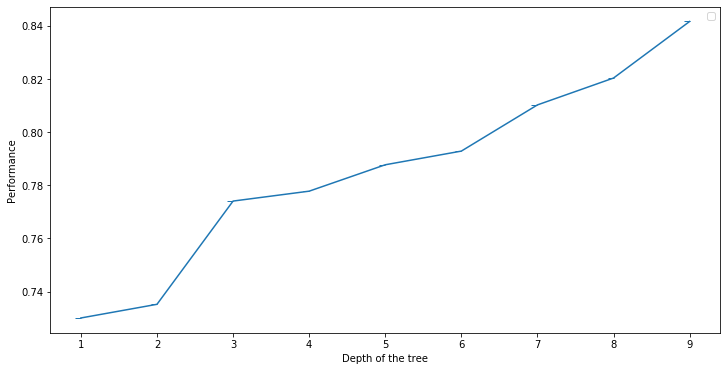

In [27]:
plt.figure(figsize=(12,6))
plt.plot(frame['max_depth'],frame['valid_acc'], marker=0)
plt.xlabel('Depth of the tree')
plt.ylabel('Performance')
plt.legend()
#created line graph which shows that as the depth of the tree increases so does its performance.

In [28]:
from sklearn import tree
!pip install graphviz
#had installed graphviz, though did not use it.

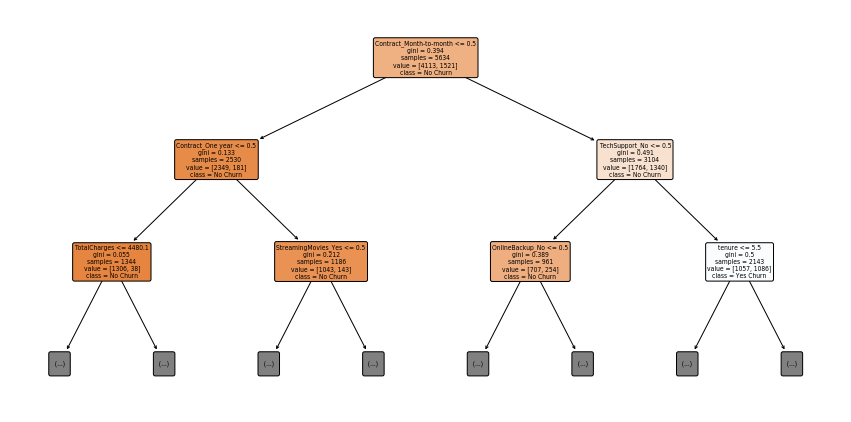

In [40]:
plt.figure(figsize=(15,7.5))
plot_tree(clf,
         filled=True,
         rounded=True, max_depth=2,
         class_names=["No Churn","Yes Churn"],
         feature_names=X_encoded.columns);
#created the decision tree which showcase the important parameters of the data


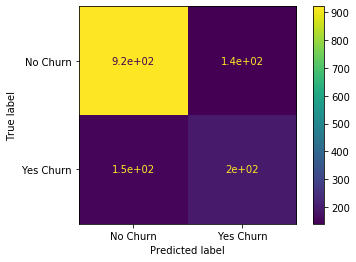

In [41]:
plot_confusion_matrix(clf,X_test,y_test, display_labels=["No Churn","Yes Churn"])
#also did create the heat map matrix of the data